In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.3
1.1.3
0.11.0


In [2]:
df = pd.read_csv('./Slump+Test.csv')

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
0,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


In [4]:
df.tail()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
98,248.3,101.0,239.1,168.9,7.7,954.2,640.6,0.0,20.0,49.97
99,248.0,101.0,239.9,169.1,7.7,949.9,644.1,2.0,20.0,50.23
100,258.8,88.0,239.6,175.3,7.6,938.9,646.0,0.0,20.0,50.50
101,297.1,40.9,239.9,194.0,7.5,908.9,651.8,27.5,67.0,49.17
102,348.7,0.1,223.1,208.5,9.6,786.2,758.1,29.0,78.0,48.77


In [5]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.00000,103.000000
mean,229.894175,77.973786,149.014563,197.167961,8.539806,883.978641,739.604854,18.048544,49.61068,36.039417
std,78.877230,60.461363,85.418080,20.208158,2.807530,88.391393,63.342117,8.750844,17.56861,7.838232
min,137.000000,0.000000,0.000000,160.000000,4.400000,708.000000,640.600000,0.000000,20.00000,17.190000
25%,152.000000,0.050000,115.500000,180.000000,6.000000,819.500000,684.500000,14.500000,38.50000,30.900000
50%,248.000000,100.000000,164.000000,196.000000,8.000000,879.000000,742.700000,21.500000,54.00000,35.520000
75%,303.900000,125.000000,235.950000,209.500000,10.000000,952.800000,788.000000,24.000000,63.75000,41.205000
max,374.000000,193.000000,260.000000,240.000000,19.000000,1049.900000,902.000000,29.000000,78.00000,58.530000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cement    103 non-null    float64
 1   Slag      103 non-null    float64
 2   Fly ash   103 non-null    float64
 3   Water     103 non-null    float64
 4   SP        103 non-null    float64
 5   Coarse    103 non-null    float64
 6   Fine      103 non-null    float64
 7   SLUMP     103 non-null    float64
 8   FLOW      103 non-null    float64
 9   Strength  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


<AxesSubplot:>

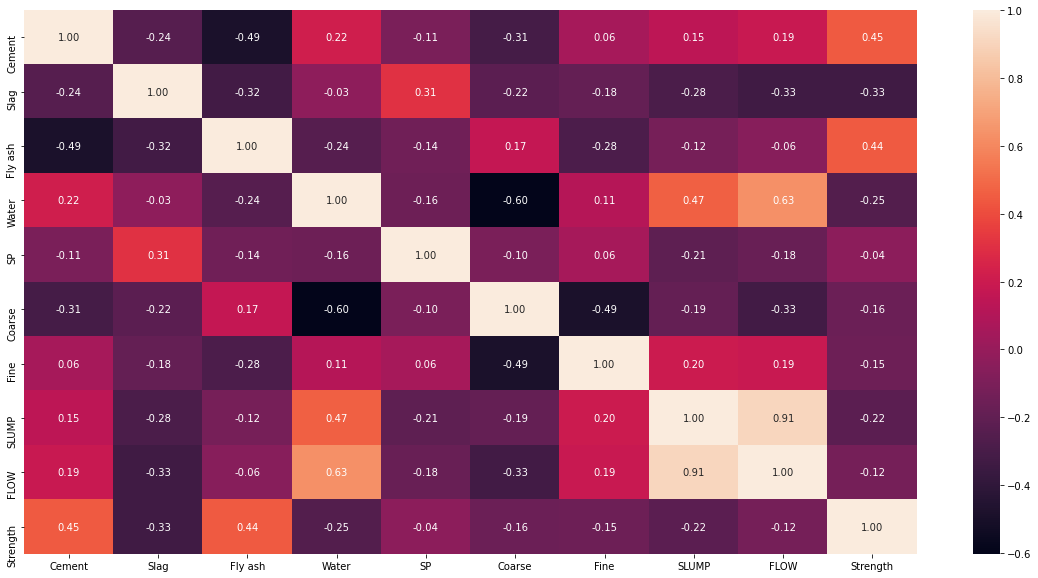

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

In [9]:
df.isnull().sum()

Cement      0
Slag        0
Fly ash     0
Water       0
SP          0
Coarse      0
Fine        0
SLUMP       0
FLOW        0
Strength    0
dtype: int64

<AxesSubplot:xlabel='Strength'>

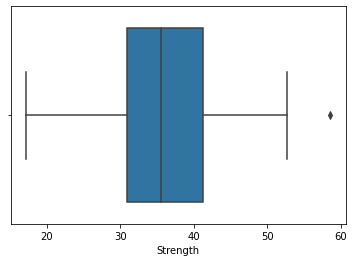

In [10]:
sns.boxplot(x='Strength', data=df)

In [13]:
Q1, Q3 = np.percentile(df['Fine'], [25, 75])
IQR = Q3 - Q1
lower_whisker_val = Q1 - (1.5* IQR)
upper_whisker_val = Q3 + (1.5* IQR)
print(IQR, lower_whisker_val, upper_whisker_val)

103.5 529.25 943.25


<AxesSubplot:xlabel='Slag', ylabel='Density'>

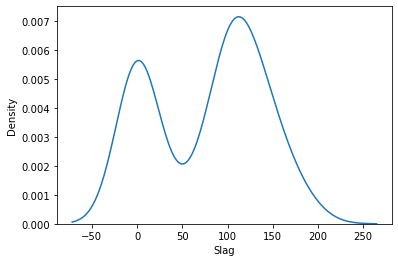

In [16]:
sns.kdeplot(df['Slag'])

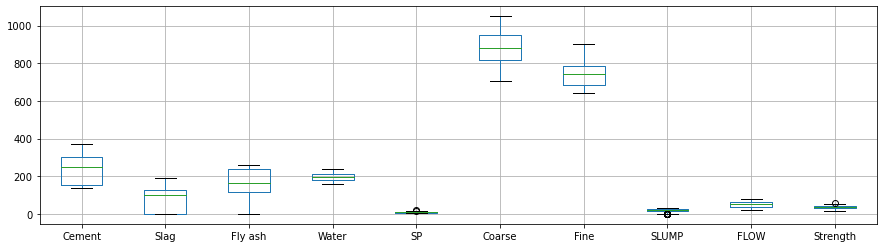

In [18]:
df.boxplot(figsize=(15,4));

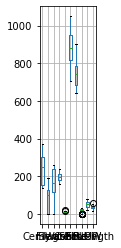

In [20]:
df.boxplot(figsize=(1,4),grid=True);

In [21]:
df.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000


In [22]:
df.cov()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
Cement,6221.617417,-1161.508095,-3278.051679,352.411380,-23.559374,-2160.342969,284.580813,100.714991,258.390259,275.572938
Slag,-1161.508095,3655.576463,-1666.164124,-32.713593,52.028211,-1196.005958,-702.843499,-150.280333,-347.591678,-157.142937
Fly ash,-3278.051679,-1666.164124,7296.248315,-416.553646,-34.415193,1303.319236,-1530.400660,-88.667135,-83.172706,297.532714
Water,352.411380,-32.713593,-416.553646,408.369650,-8.819791,-1075.668338,146.679569,82.507208,224.387600,-40.269862
SP,-23.559374,52.028211,-34.415193,-8.819791,7.882223,-25.848357,10.366079,-5.230628,-8.696606,-0.833388
Coarse,-2160.342969,-1196.005958,1303.319236,-1075.668338,-25.848357,7813.038363,-2735.267542,-145.539394,-505.918691,-111.327013
Fine,284.580813,-702.843499,-1530.400660,146.679569,10.366079,-2735.267542,4012.223800,112.118880,211.849555,-76.699948
SLUMP,100.714991,-150.280333,-88.667135,82.507208,-5.230628,-145.539394,112.118880,76.577277,139.309280,-15.320388
FLOW,258.390259,-347.591678,-83.172706,224.387600,-8.696606,-505.918691,211.849555,139.309280,308.656061,-17.079700
Strength,275.572938,-157.142937,297.532714,-40.269862,-0.833388,-111.327013,-76.699948,-15.320388,-17.079700,61.437878


In [25]:
from scipy.stats import zscore
data_scaled = df.apply(zscore)
data_scaled.corr()

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000


In [27]:
data_scaled.cov(ddof=0)

,Cement,Slag,Fly ash,Water,SP,Coarse,Fine,SLUMP,FLOW,Strength
Cement,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029
Strength,0.445725,-0.331588,0.444393,-0.254235,-0.037871,-0.160684,-0.154484,-0.223358,-0.124029,1.000000
